In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [12]:
df = pd.read_csv('Data/Preprocessed/NYC_all_cities_clean.csv')

In [25]:
# Define features and target
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(8702, 6)
(2176, 6)


Epoch 1/10
245/245 [==============================] - 1s 2ms/step - loss: 51169.9648 - val_loss: 37.1916
Epoch 2/10
245/245 [==============================] - 0s 1ms/step - loss: 39.7040 - val_loss: 36.6071
Epoch 3/10
245/245 [==============================] - 0s 1ms/step - loss: 35.1310 - val_loss: 29.2449
Epoch 4/10
245/245 [==============================] - 0s 1ms/step - loss: 24.7190 - val_loss: 17.0288
Epoch 5/10
245/245 [==============================] - 0s 2ms/step - loss: 14.6369 - val_loss: 9.2690
Epoch 6/10
245/245 [==============================] - 0s 1ms/step - loss: 8.2610 - val_loss: 7.5280
Epoch 7/10
245/245 [==============================] - 0s 2ms/step - loss: 1.2984 - val_loss: 0.3067
Epoch 8/10
245/245 [==============================] - 0s 1ms/step - loss: 0.1821 - val_loss: 0.1411
Epoch 9/10
245/245 [==============================] - 0s 1ms/step - loss: 0.1958 - val_loss: 0.2277
Epoch 10/10
245/245 [==============================] - 0s 2ms/step - loss: 0.2686 - val_

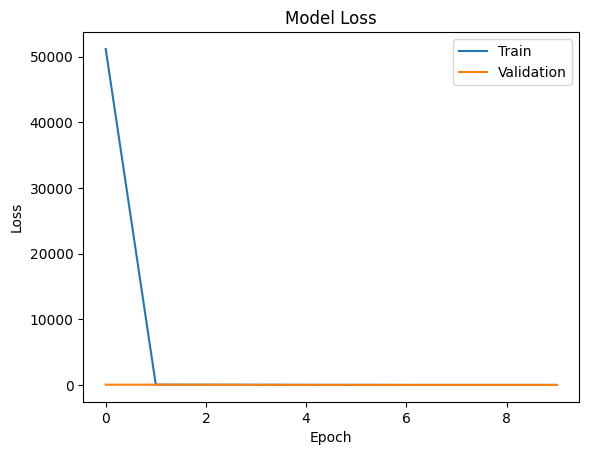

In [29]:
# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

optimizer = Adam(learning_rate=0.0001)  # Adjust the learning rate as needed

# Compile the model with the defined optimizer and loss function
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [32]:
predictions_train = model.predict(X_train)
pd.DataFrame(predictions_train , y_train)



predictions_test = model.predict(X_test)
pd.DataFrame(predictions_test , y_test)

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

mse = mean_squared_error(y_train, predictions_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions_test)
r_squared_test = r2_score(y_test, predictions_test)
r_squared_train = r2_score(y_train, predictions_train)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared for test data (R²): {r_squared_test}')

print(f'R-squared for train data(R²): {r_squared_train}')

68/68 [==============================] - 0s 999us/step
Test Loss: 0.12094610929489136
Mean Squared Error (MSE): 0.1015929923084027
Root Mean Squared Error (RMSE): 0.31873655627869657
Mean Absolute Error (MAE): 0.25069251705464324
R-squared for test data (R²): 0.8910260637100573
R-squared for train data(R²): 0.9038275238115224


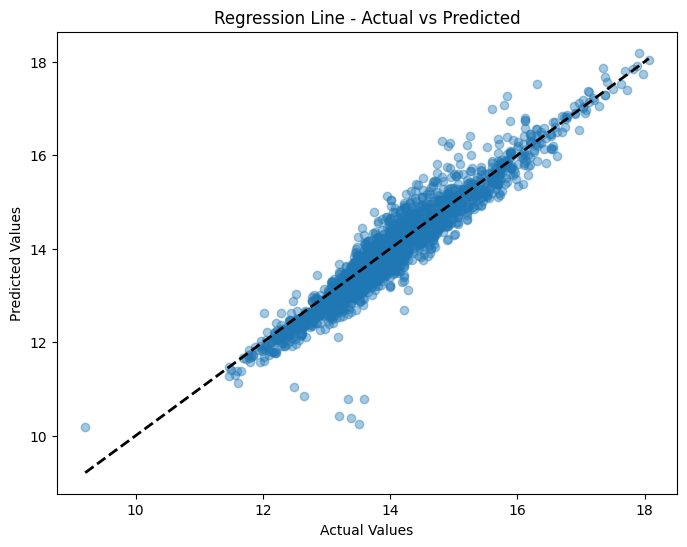

In [33]:
# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test, alpha=0.4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Line - Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.show()

In [34]:
# Save the model to a file
model.save('All_cities_model.h5')

C:\Users\hsohr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
